# Overview

This week's curriculum is a little bit of a mixed bag. We'll cover 2 topics that are not super-related, but both are _very useful_ (and there is some connection between them). The overview is

* Tricks for raw text (NLPP, Chapter 3) and finding the important words in a document (TF-IDF)
* Community Detection

In the first part, we will take a quick tour of NLPP's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the second part we will go back to network science, discussing community detection and trying it out on our very own dataset.

## The informal intro

You didn't think you'd be able to avoid hearing a little update from me, did you? I didn't think so :) 
* Today, I'll go over the work we'll be focusing on today, then
* And finally, I'll talk a tiny amount about the next phase of the class (the project assignments).

(Next week, however, the informal intro will provide full details about the project phase of the class, so that's one not to miss.)

> **Video** [A few comments about today + the final project](https://www.dropbox.com/scl/fi/1l8jbtye91705f90sq1w0/Week7.mp4?rlkey=h0fwvdpetaaf33bz2it28d6s1&dl=0)

# Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 


> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Words that characterize the rappers

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk a little bit about one of my favorite papers: [A mystery case to solve](https://www.dropbox.com/scl/fi/4bumpw918ez2de38k12w2/Binongo.mp4?rlkey=9wxe6kbvo9mr09bzyyxb1pzjl&dl=0).  

Now, we'll use the wordcloud visualization techniques from the paper/video to learn about the wiki-pages we've downloaded. 

In the exercises below, we'll use a technique from Sune Lehmann's very own brain to do the West coast vs. East coast comparison (he calls call it "TF-TR"). Then proceed to some network analysis (!) to find network communities among rappers from one of the coasts. Finally, jump back to NLP to use the communities we've just found to play with TF-IDF, a more standard technique. 

We'll also do a bit of data cleaning along the way (using some of the stuff you've just read about in Chapter 3).

_Exercise_ 1: Comparing word-counts of West-coast and East-coast rappers. \[The longest exercise in the class 😱\]. It consists of four steps. And it's great.


**Step one: TF List**

The goal of this exercise is to create your own wordclouds, characterizing the two coasts. Check out my awesome word-clouds below. I think it's pretty clear

East coast            |  West coast
:-------------------------:|:-------------------------:
![im](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2023/master/files/wordcloud_east.png "east")  |  ![im](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2023/master/files/wordcloud_west.png "west")


*Setup*. All you need now is the wikipedia pages of the rappers. If you didn't keep the wiki pages you previously downloaded, you can find them [here](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/eastcoasttexts.zip) and [here](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/westcoasttexts.zip).

Once you have the texts down on your own computer, you will want to aggregate the text into two long lists. One based on all the text from the West coast pages, and one based on all the text from the East coast pages. In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. For example, my West coast list contains the entries:

```
...

dre 578
snoop 424
california 458

...
```
This list is called a ***Term Frequency*** (or TF) list. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into individual strings
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words

If you are confused by the instructions for cleaning, go back and have a  look Chapter 3 again. 

> *Action item*: 
> * Create your TF list for each coast.

In [11]:
import nltk, re, pprint
import pandas as pd
import requests
import os
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt

In [12]:
df_rappers = pd.read_csv('../files/Rappers.csv')

west_file_list = []
east_file_list = []
for i, (rapper, coast) in enumerate(zip(df_rappers["WikipediaPageName"],df_rappers["Coast"])):
    print(i, rapper)

    # save text to file
    file_name = rapper + '.txt'
    file_name = file_name.replace('-', '_')
    file_name = file_name.replace(' ', '_')
    file_name = file_name.replace('?', '')
    if coast == "West":
        west_file_list.append(file_name)
    else:
        east_file_list.append(file_name)

0 6ix9ine
1 9th Prince
2 22Gz
3 38 Spesh
4 The 45 King
5 50 Cent
6 60 Second Assassin (rapper)
7 88-Keys
8 Sammy Adams
9 Adeem (rapper)
10 Aesop Rock
11 Afu-Ra
12 Akir
13 Akrobatik
14 Alias (musician)
15 Hoodie Allen
16 Amil
17 Antoinette (rapper)
18 Aone Beats
19 Apache (rapper)
20 Apathy (rapper)
21 AR-Ab
22 AraabMuzik
23 Arkatech Beatz
24 M. K. Asante
25 Asheru
26 The Audible Doctor
27 Awkwafina
28 AZ (rapper)
29 Apani B. Fly
30 DJ Babu
31 Bahamadia
32 Marty Baller
33 Charli Baltimore
34 Afrika Bambaataa
35 Bodega Bamz
36 Azealia Banks
37 Lloyd Banks
38 MC Paul Barman
39 Mark Batson
40 The Beat Bully
41 Jahlil Beats
42 Beedie (rapper)
43 Benny the Butcher
44 Benzino
45 Big Body Bes
46 Big Daddy Kane
47 Big Pun
48 Big Shug
49 Bkorn
50 Black Child
51 Black Rob
52 Black Thought
53 Memphis Bleek
54 Blockhead (music producer)
55 Action Bronson
56 Bronx Style Bob
57 Foxy Brown (rapper)
58 Tommy Brown (record producer)
59 Ron Browz
60 Buckshot (rapper)
61 Buckwild (music producer)
62 Joe B

In [13]:
corpus_root = 'rapper_texts'
west_corpus = PlaintextCorpusReader(corpus_root, west_file_list)
print(west_corpus.fileids())
print(len(west_corpus.words()))
print(len(west_corpus.sents()))

corpus_root = 'rapper_texts'
east_corpus = PlaintextCorpusReader(corpus_root, east_file_list)
print(east_corpus.fileids())
print(len(east_corpus.words()))
print(len(east_corpus.sents()))

west_raw = west_corpus.raw()
east_raw = east_corpus.raw()

['03_Greedo.txt', '24kGoldn.txt', '40_Glocc.txt', 'A_Plus_(rapper).txt', 'DJ_A_Tron.txt', 'Ab_Soul.txt', 'Abstract_Rude.txt', 'Aceyalone.txt', 'Afroman.txt', 'Ahmad_(rapper).txt', "Ak'Sent.txt", 'The_Alchemist_(musician).txt', 'AMG_(rapper).txt', 'Aminé_(rapper).txt', 'Antwon.txt', 'Aztlan_Underground.txt', 'B_Legit.txt', 'B_Real.txt', 'B.G._Knocc_Out.txt', 'Show_Banga.txt', 'Ant_Banks.txt', 'Sho_Baraka.txt', 'Bavgate.txt', 'Becky_G.txt', 'Beeda_Weeda.txt', 'Beefy_(rapper).txt', 'Berner_(rapper).txt', 'Big_B_(rapper).txt', 'Big_Dave_(rapper).txt', 'Big_Ed_(rapper).txt', 'Big_Fase_100.txt', 'Bizzle.txt', 'Aloe_Blacc.txt', 'Black_Pegasus.txt', 'Guerilla_Black.txt', 'Nissim_Black.txt', 'Toni_Blackman.txt', 'Blueface.txt', 'Blxst.txt', 'Bones_(rapper).txt', 'Braille_(musician).txt', 'Buddy_(rapper).txt', 'Busdriver.txt', 'Scott_Caan.txt', 'Sway_Calloway.txt', 'Nick_Cannon.txt', "Captain_Save_'Em.txt", 'Clyde_Carson.txt', 'Celestaphone.txt', 'DJ_Cheapshot.txt', 'Tha_Chill.txt', 'Shawn_Chrys

456422
17636
['6ix9ine.txt', '9th_Prince.txt', '22Gz.txt', '38_Spesh.txt', 'The_45_King.txt', '50_Cent.txt', '60_Second_Assassin_(rapper).txt', '88_Keys.txt', 'Sammy_Adams.txt', 'Adeem_(rapper).txt', 'Aesop_Rock.txt', 'Afu_Ra.txt', 'Akir.txt', 'Akrobatik.txt', 'Alias_(musician).txt', 'Hoodie_Allen.txt', 'Amil.txt', 'Antoinette_(rapper).txt', 'Aone_Beats.txt', 'Apache_(rapper).txt', 'Apathy_(rapper).txt', 'AR_Ab.txt', 'AraabMuzik.txt', 'Arkatech_Beatz.txt', 'M._K._Asante.txt', 'Asheru.txt', 'The_Audible_Doctor.txt', 'Awkwafina.txt', 'AZ_(rapper).txt', 'Apani_B._Fly.txt', 'DJ_Babu.txt', 'Bahamadia.txt', 'Marty_Baller.txt', 'Charli_Baltimore.txt', 'Afrika_Bambaataa.txt', 'Bodega_Bamz.txt', 'Azealia_Banks.txt', 'Lloyd_Banks.txt', 'MC_Paul_Barman.txt', 'Mark_Batson.txt', 'The_Beat_Bully.txt', 'Jahlil_Beats.txt', 'Beedie_(rapper).txt', 'Benny_the_Butcher.txt', 'Benzino.txt', 'Big_Body_Bes.txt', 'Big_Daddy_Kane.txt', 'Big_Pun.txt', 'Big_Shug.txt', 'Bkorn.txt', 'Black_Child.txt', 'Black_Rob.tx

In [14]:
print(type(west_raw))
west_tokens = word_tokenize(west_raw)
print(west_tokens[:10])
print(type(west_tokens))
west_words = [w.lower() for w in west_tokens if w.isalpha()]
print(west_words[:10])
east_tokens = word_tokenize(east_raw)
east_words = [w.lower() for w in east_tokens if w.isalpha()]

<class 'str'>
['Jason', 'Jamal', 'Jackson', '(', 'born', 'July', '26', ',', '1987', ')']
<class 'list'>
['jason', 'jamal', 'jackson', 'born', 'july', 'known', 'professionally', 'as', 'greedo', 'is']


In [15]:
fdist_west = FreqDist(west_words)
fdist_east = FreqDist(east_words)
dict_west_count = dict()
dict_east_count = dict()
for w in west_words:
    dict_west_count[w] = fdist_west[w]

for w in east_words:
    dict_east_count[w] = fdist_east[w]

print(dict_west_count)

{'jason': 19, 'jamal': 9, 'jackson': 84, 'born': 530, 'july': 344, 'known': 518, 'professionally': 76, 'as': 2784, 'greedo': 7, 'is': 1690, 'an': 1300, 'american': 561, 'rapper': 796, 'singer': 222, 'songwriter': 82, 'and': 9743, 'producer': 367, 'from': 2166, 'the': 17242, 'watts': 20, 'neighborhood': 62, 'of': 6425, 'city': 201, 'los': 423, 'angeles': 393, 'california': 444, 'he': 4261, 'began': 369, 'to': 5097, 'gain': 22, 'recognition': 33, 'for': 2614, 'his': 4589, 'purple': 16, 'summer': 100, 'mixtape': 446, 'series': 254, 'that': 1952, 'started': 218, 'in': 7772, 'then': 309, 'saw': 47, 'more': 302, 'mainstream': 50, 'attention': 79, 'with': 4198, 'release': 605, 'wolf': 30, 'grape': 4, 'street': 158, 'debut': 629, 'studio': 625, 'album': 2921, 'god': 70, 'level': 29, 'was': 4294, 'released': 2532, 'on': 6071, 'june': 358, 'sentenced': 26, 'years': 320, 'prison': 51, 'drug': 48, 'trafficking': 8, 'possession': 30, 'a': 6372, 'firearm': 14, 'charges': 46, 'january': 299, 'it': 15

**Step two: Word weights**

TF is not necessarily a good way of sorting a list, since many words are very common, so the most common words are not necessarily the most important ones. This is clear from the top counts in my west coast TF list

```
the 17309
and 9778
in 8237
a 6985
of 6434
on 6341
to 5107
his 4619
he 4325
was 4266

 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's important.*** Thus, to create awesome and informative wordclouds like the ones I created above, we want to extract what's special about each of the two lists we're comparing. 

The general way of doing that is using a strategy called TF-IDF. We will explore that strategy in exercise 4 below. But out-of-the-box TF-IDF gets a bit weird when we only have two groups to compare. So we'll do something different (but related) here. 

We want to use the information stored in TF, which is important since it says something about the most frequently occuring words. **But we want to weigh the TF information** using additional information about what is unique about each coast. 

Specifically, we want to set things up such that - in the west-coast list, for example - words that are unique to the West Coast get a high weight, while words that are unique to the East Coast get a low weight, and words that occur at the same frequency in both lists are neutral. Vice versa for the west-coast list.

The way I chose to set up the weights here is simple. I use term ratios (TR), which I just made up, so don't look it up on the internet. What we care about is words that are used very differently for the two coasts, so we just use their ratios. 

**normalization..** Let me start with an example. The word `california` occurs 458 in the West-coast TF list and 87 times in the East-coast TF list, thus I set it's West-coast weight to

$$w_\textrm{california}^{(m)} = \frac{458}{87 + c} = 4.28.$$

Similarly, its East-coast weight is 

$$w_\textrm{california}^{(d)} = \frac{87}{458 + c} = 0.18.$$

In both cases, I add the constant $c$ to the denominator in case a word occurs zero times. You can play around with the size of $c$ to understand the effect of chosing small/large values of it.

In general for some token $t$ with term frequency $\textrm{TF}^{(u)}_t$, in coast $u$ where $u \in \{w,e\}$, we define the weight as:

$$w_{t}^{(w)} = \frac{\textrm{TF}^{(w)}_t}{ \textrm{TF}^{(e)}_t + c}, \qquad \textrm{and} \qquad w_{t}^{(e)} = \frac{\textrm{TF}^{(e)}_t}{ \textrm{TF}^{(w)}_t + c}. $$

Thus, now we're ready to lists for each univers, where the ranking of token $t$ on list $u$ is given by $\textrm{TF}^{(u)}_t \times w_{t}^{(u)}$. I call this the *TF-TR* lists. 

Note that the *TF-TR* lists have the properties that we requested above. The weight associated with a word is large when a word occurs much more frequently in the list we consider, compared to the other list. It's small when a word is rare in our list and frequent in the other. And it's approximately equal to one, when the word is equally frequent in both lists. (The downside is that it only works when you're finding important terms while comparing two lists).

> *Action item*: 
> * Create your TF-TR list for each coast.
> * Check out top 10 for each coast. Does it make sense?

The takehome here is that we get a good ranking by combining the term frequency with some weighting scheme. But, as we will see below, the TR weight that I created is not the only possible weight. There are many other options.

-----------

PS. Above in creating the ratios, I'm assuming that the coast pages have a comparable number of words in them. That's pretty much true (up to a factor of 2). And while the approximation is OK for our purposes, it's not true in general. If you'd like an extra challenge, you can figure out how to account for differences in the size of each coast corpus.

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
for w in dict_west_count.copy():
    if w in stopwords:
        del dict_west_count[w]
        
for w in dict_east_count.copy():
    if w in stopwords:
        del dict_east_count[w] 

In [17]:
dict_west_w = dict()
dict_east_w = dict()
dict_west_TFTR = dict()
dict_east_TFTR = dict()
c = 1

for w in dict_west_count:
    if w in dict_east_count:
        dict_west_w[w] = dict_west_count[w]/(dict_east_count[w]+c)
        dict_east_w[w] = dict_east_count[w]/(dict_west_count[w]+c)
        dict_east_TFTR[w] = dict_east_w[w]*dict_east_count[w]
    else:
        dict_west_w[w] = dict_west_count[w]/c
        dict_east_w[w] = 0
        dict_east_TFTR[w] = 0
    dict_west_TFTR[w] = dict_west_w[w]*dict_west_count[w]
    
for w in dict_east_count:
    if w not in dict_west_count:
        dict_west_w[w] = 0
        dict_east_w[w] = dict_east_count[w]/c
        dict_west_TFTR[w] = 0
        dict_east_TFTR[w] = dict_east_w[w]*dict_east_count[w]
print(dict_west_w)
print(dict_west_TFTR)
dict_west_TFTR = dict(sorted(dict_west_TFTR.items(), key=lambda x:x[1], reverse=True))
dict_east_TFTR = dict(sorted(dict_east_TFTR.items(), key=lambda x:x[1], reverse=True))
print(dict_west_TFTR)
print(dict_east_TFTR)

{'jason': 0.4523809523809524, 'jamal': 0.45, 'jackson': 0.23728813559322035, 'born': 0.6964520367936925, 'july': 0.6653771760154739, 'known': 0.6371463714637147, 'professionally': 0.6129032258064516, 'greedo': 7.0, 'american': 0.7957446808510639, 'rapper': 0.6573080099091659, 'singer': 1.2131147540983607, 'songwriter': 0.9647058823529412, 'producer': 0.4427020506634499, 'watts': 1.8181818181818181, 'neighborhood': 0.6262626262626263, 'city': 0.3210862619808307, 'los': 3.0875912408759123, 'angeles': 3.330508474576271, 'california': 5.349397590361446, 'began': 0.6362068965517241, 'gain': 0.6470588235294118, 'recognition': 0.4230769230769231, 'purple': 0.8888888888888888, 'summer': 0.5882352941176471, 'mixtape': 0.5138248847926268, 'series': 0.5746606334841629, 'started': 0.7077922077922078, 'saw': 0.573170731707317, 'mainstream': 0.6172839506172839, 'attention': 0.6694915254237288, 'release': 0.6463675213675214, 'wolf': 2.142857142857143, 'grape': 2.0, 'street': 0.587360594795539, 'debut

**Step three: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step four: Draw the wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each cost. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)
> 

In [18]:
west_str = ""
east_str = ""
for w in dict_west_TFTR:
    for i in range(int(dict_west_TFTR[w])):
        west_str += w + " "

for w in dict_east_TFTR:
    for i in range(int(dict_east_TFTR[w])):
        east_str += w + " "

print(west_str[:100])


okonma okonma okonma okonma okonma okonma okonma okonma okonma okonma okonma okonma okonma okonma ok


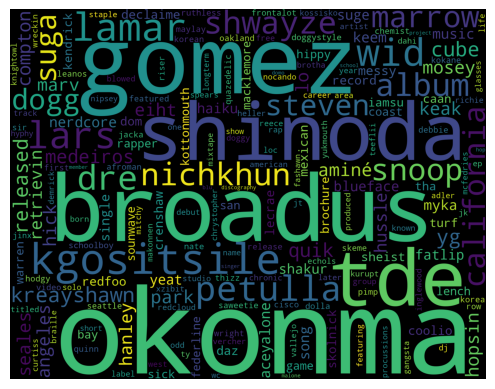

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

west_wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400,
                      collocations = False
                     ).generate(west_str)

plt.imshow(west_wordcloud)
plt.axis('off')
plt.savefig('west_cloud.png', dpi=300)
plt.show()

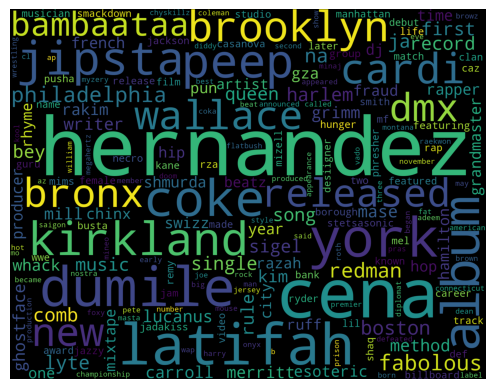

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

east_wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400,
                      collocations = False
                     ).generate(east_str)

plt.imshow(east_wordcloud)
plt.axis('off')
plt.savefig('east_cloud.png', dpi=300)
plt.show()

# Community detection


Now that we have worked hard on text analysis, it is time to go back to our network! 

Before we begin, let's watch a great lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: [Communities in networks](https://www.dropbox.com/scl/fi/jw6prey62yyc0cpjnk4nv/Communities.mp4?rlkey=62lulz7b238rmiuaenbm8ts8t&dl=0). 

*Exercise 2*: Use the concept of modularity to explore how _community-like_ the coasts are.
> 
> * Explain the concept of modularity in your own words.
> * Consider the undirected version of the entire network, including both coasts.
> * Now create your own partition into communities, where all west-coast rappers are one community and all the east-coast rappers are another community. That's all you need, **now calculate the modularity of this partition**. Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the coasts good communities?
> * Would you expect this result in light of what we have found in the previous exercises?

In [24]:
import networkx as nx

In [28]:
# load east graph from gexf file
west_graph = nx.read_gexf('rappers_west.gexf')
west_graph = west_graph.to_undirected()
east_graph = nx.read_gexf('rappers_east.gexf')
east_graph = east_graph.to_undirected()
all_graph = nx.read_gexf('rappers_undirected.gexf')


In [30]:
L_west = west_graph.number_of_edges()
L_east = east_graph.number_of_edges()
L = all_graph.number_of_edges()

In [31]:
M_west = L_west/L
M_east = L_east/L
M = M_west + M_east
print(M_west, M_east, M)

0.2727272727272727 0.5031382871026524 0.7758655598299251


*Exercise 3*: Community detection, considering each coast separately. 
> * Consider the network of rappers for each coast separately. 
>    - **Note**. For this exercise, it's OK to just pick one of the coasts. 
>    - If you want to work with the entire network. Then run community detection on each coast separately, then combine results to get a list containing all communities from both parts of the network.
>    - (The reason for this is that the strong split between the coasts can confuse the algorithm a bit).
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in each network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the coasts as communities? What does this comparison reveal about them?
    >   * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
    >   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2). This time assign each node a different color based on their _community_. Describe the structure you observe.


In [33]:
import community

In [ ]:
partition = community.best_partition(all_graph)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

Now we jump back into the NLP work. **It's still OK to work with just one coast**. In this last exercise, we'll be creating word-clouds again. But this time, we'll be using the more standard method: TF-IDF.


*Exercise 4*: Wrap your brain around TF-IDF



First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is still to have a *term frequency* (TF) and a *weight* (IDF), but there are some additional things going on. For example, there are multiple definitions of TF. We just looked at the raw counts.

> *Action items*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.
>   * What does IDF stand for?

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?
>   * Explain why using IDF makes stopword removal less important.
>   * In the TR weight that I defined in Exercise 1, we take into account how frequently each word appears inside each of the two documents. Is information of word counts inside each document used in the definition of IDF on Wikipedia?

I noted above that out-of-the box worked weirdly when you only have two documents. Let's see why that's the case. If we grab one of the simple definitions of IDF-weight from wikipedia

$$\log \left( \frac{N}{n_t+1} \right) + 1.$$

Where $N = 2$ is the number of documents and $n_t \in \{1,2\}$ is the number of documents containing the term $t$.

> *Action item*
>   * What are the possible weights that a word can have?
>   * Explain in your own words why TF-IDF might not result in ideal wordclouds when you only have two documents.

*Pro-level consideration*: It is, of course, possible to define IDF weighting schemes that incorporate information of word counts within each document, even if you have more than two documents. If you'd like to try to do that below, it's OK with me. If not, that's also fine.

**To be continued ...**. Next week, we'll look at sentiment and TFIDF for communities.